In [181]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [182]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_loader import generateGauss, generateUniform
from utils.integral import grid
from Models.clustering import csiFCF
from utils.vis import plotHeatmap_U, plotPDF_Theta, plot_OF, temp, plot_silhouette_values, plot_CVI_with_k

In [183]:
# bandwidth = 0.01
# grid_x    = grid(bandwidth, start=-5, end=15)
# mu        = np.array([0.3, 4.0, 9.1, 1.0, 5.5, 8.0, 4.8])

# # Chọn độ rộng cố định cho Uniform
# width = 2.0

# # Tính a và b sao cho mean = mu
# a_list = mu - width / 2
# b_list = mu + width / 2

# # Gọi lại hàm generateUniform
# F_data = generateUniform(a_list, b_list, grid_x)

In [184]:
# Load the .npz file
data = np.load("../dataset/G_data.npz")
F_data = data['G_data']
grid_x = data['grid_x']
bandwidth = data['bandwidth']

In [185]:
cluster=csiFCF.Model(
   grid_x=grid_x,
	num_clusters=2,
	fuzziness= 2,
	max_iterations= 100,
	tolerance= 1e-6,
	distance_metric= 'BC',
	verbose = True,
)
cluster.fit(F_data)
U, Theta, J = cluster.get_results()
labels = cluster.get_hard_assignments()

[CSI-FCM] Iteration   1 | ΔU = 2.387903e+00 | J = 2.796998
           Cluster sizes: [0.58 0.42] | rho_k: [0.724 1.   ]
           Max change in U: 5.9347e-01
[CSI-FCM] Iteration   2 | ΔU = 1.863326e+00 | J = 2.290508
           Cluster sizes: [0.6 0.4] | rho_k: [0.667 1.   ]
           Max change in U: 2.1730e-01
[CSI-FCM] Iteration   3 | ΔU = 2.360217e+00 | J = 0.648963
           Cluster sizes: [0.58 0.42] | rho_k: [0.724 1.   ]
           Max change in U: 4.2621e-01
[CSI-FCM] Iteration   4 | ΔU = 5.689329e-01 | J = 0.499975
           Cluster sizes: [0.54 0.46] | rho_k: [0.852 1.   ]
           Max change in U: 2.5941e-01
[CSI-FCM] Iteration   5 | ΔU = 2.724236e-01 | J = 0.497594
           Cluster sizes: [0.52 0.48] | rho_k: [0.923 1.   ]
           Max change in U: 1.2819e-01
[CSI-FCM] Iteration   6 | ΔU = 1.102670e-01 | J = 0.492036
           Cluster sizes: [0.52 0.48] | rho_k: [0.923 1.   ]
           Max change in U: 5.3562e-02
[CSI-FCM] Iteration   7 | ΔU = 8.530008e-02 | J 

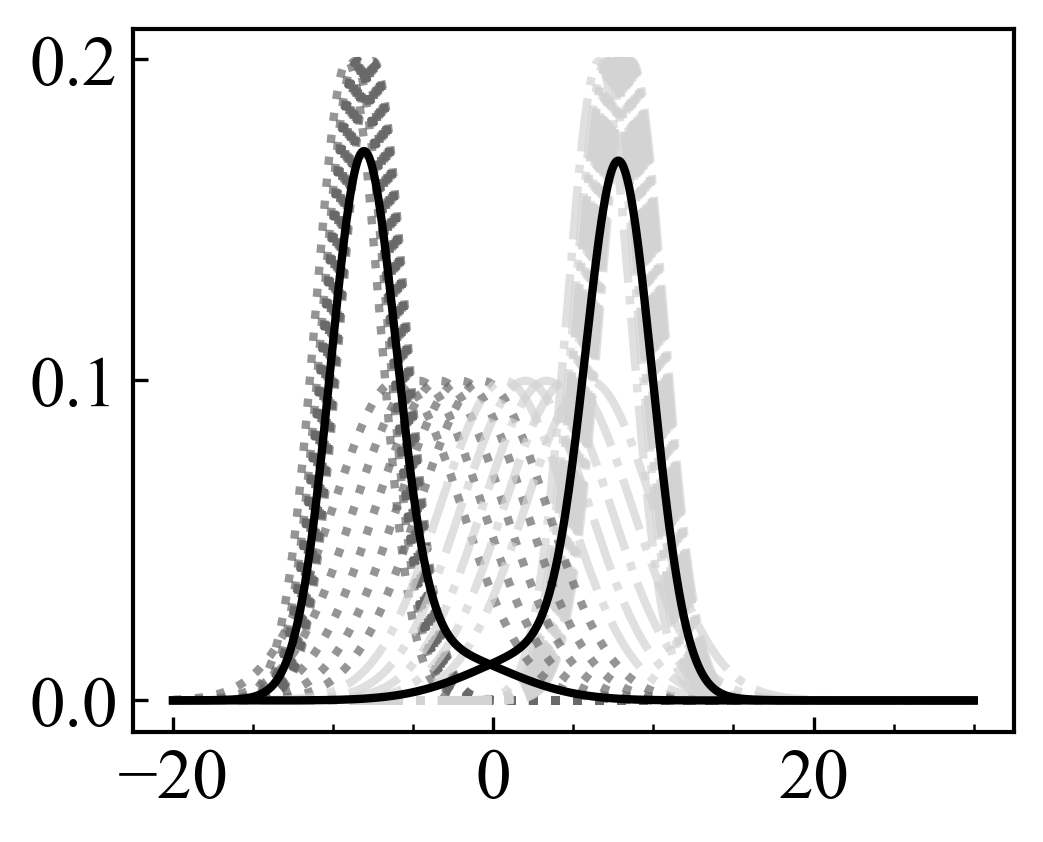

In [186]:
# plotPDF_Theta(grid_x, F_data, theta=Theta)
plt.figure()
temp(fontsize=18, w=10, h=5, u='centimeters')

# pdfs
for i in range(F_data.shape[0]):
	ls = '-.' if labels[i] == 0 else ':'
	color = 'lightgray' if labels[i] == 0 else 'dimgray'
	plt.plot(grid_x, F_data[i], lw=2, color=color, linestyle=ls, alpha=0.7)

# prototype
for j in range(cluster.num_clusters):
	plt.plot(grid_x, Theta[j, :], lw=2, linestyle='-', color='black')

plt.tight_layout()
# plt.savefig("FCF_V4.pdf", bbox_inches='tight')

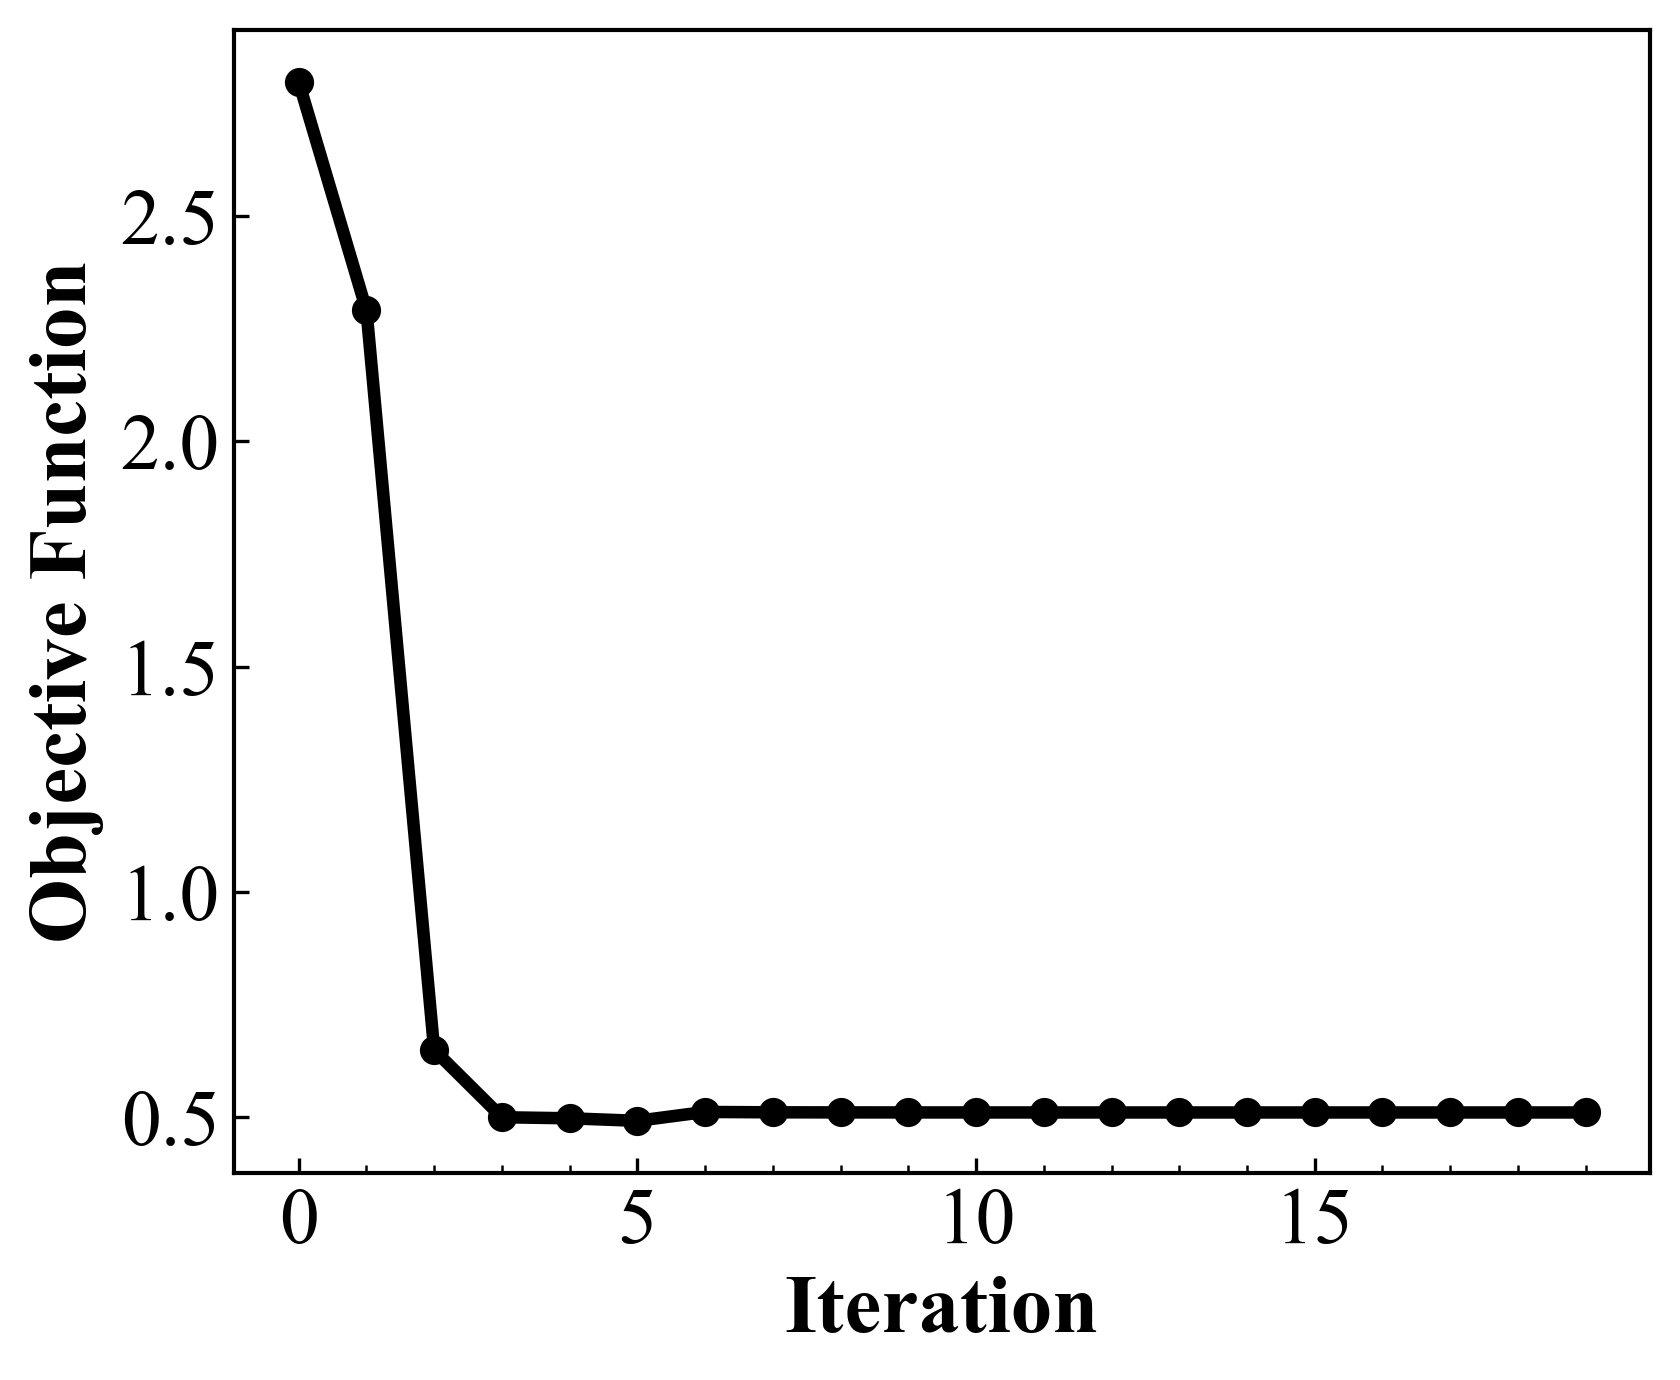

In [187]:
# plot_OF(J)
plt.figure(figsize=(6, 5))
temp(fontsize=20)

plt.plot(J, lw = 3,color = 'black', marker='o')
plt.xlabel("Iteration")
plt.ylabel("Objective Function")
plt.tight_layout()



In [188]:
# from utils.vali import CVI

# evaluator = CVI(distance_metric='BC',bandwidth=bandwidth, grid=grid_x)


# sil = evaluator.silhouette_index(F_data, labels)
# dunn = evaluator.dunn_index(F_data, labels)
# dbi = evaluator.davies_bouldin_index(F_data, labels)

# print(f"Silhouette = {sil:.4f}, Dunn = {dunn:.4f}, DBI = {dbi:.4f}")

In [189]:
# sil_values = plot_silhouette_values(F_data, labels,
#                                     distance_metric='BC',
#                                     bandwidth=bandwidth,
#                                     grid=grid_x)
# print("Silhouette fj:", sil_values)

In [190]:
# num_clusters_range = range(2, 8)
# silhouette_scores, dunn_scores, dbi_scores = [], [], []

# for k in num_clusters_range:
# 	cluster = csiFCF.Model(
# 	grid_x=grid_x,
# 	num_clusters=k,
# 	fuzziness=2,
# 	max_iterations=100,
# 	tolerance=1e-5,
# 	centroid_mode="frechet",
# 	distance_metric='W2',
# 	verbose=False
# 	)
# 	cluster.fit(F_data)
# 	labels = cluster.get_hard_assignments()
# 	evaluator = CVI(distance_metric='W2', bandwidth=bandwidth, grid=grid_x)

# 	sil = evaluator.silhouette_index(F_data, labels)
# 	dunn = evaluator.dunn_index(F_data, labels)
# 	dbi = evaluator.davies_bouldin_index(F_data, labels)

# 	silhouette_scores.append(sil)
# 	dunn_scores.append(dunn)
# 	dbi_scores.append(dbi)

# plot_CVI_with_k(num_clusters_range, silhouette_scores, dunn_scores, dbi_scores)